In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('onlineshopper.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


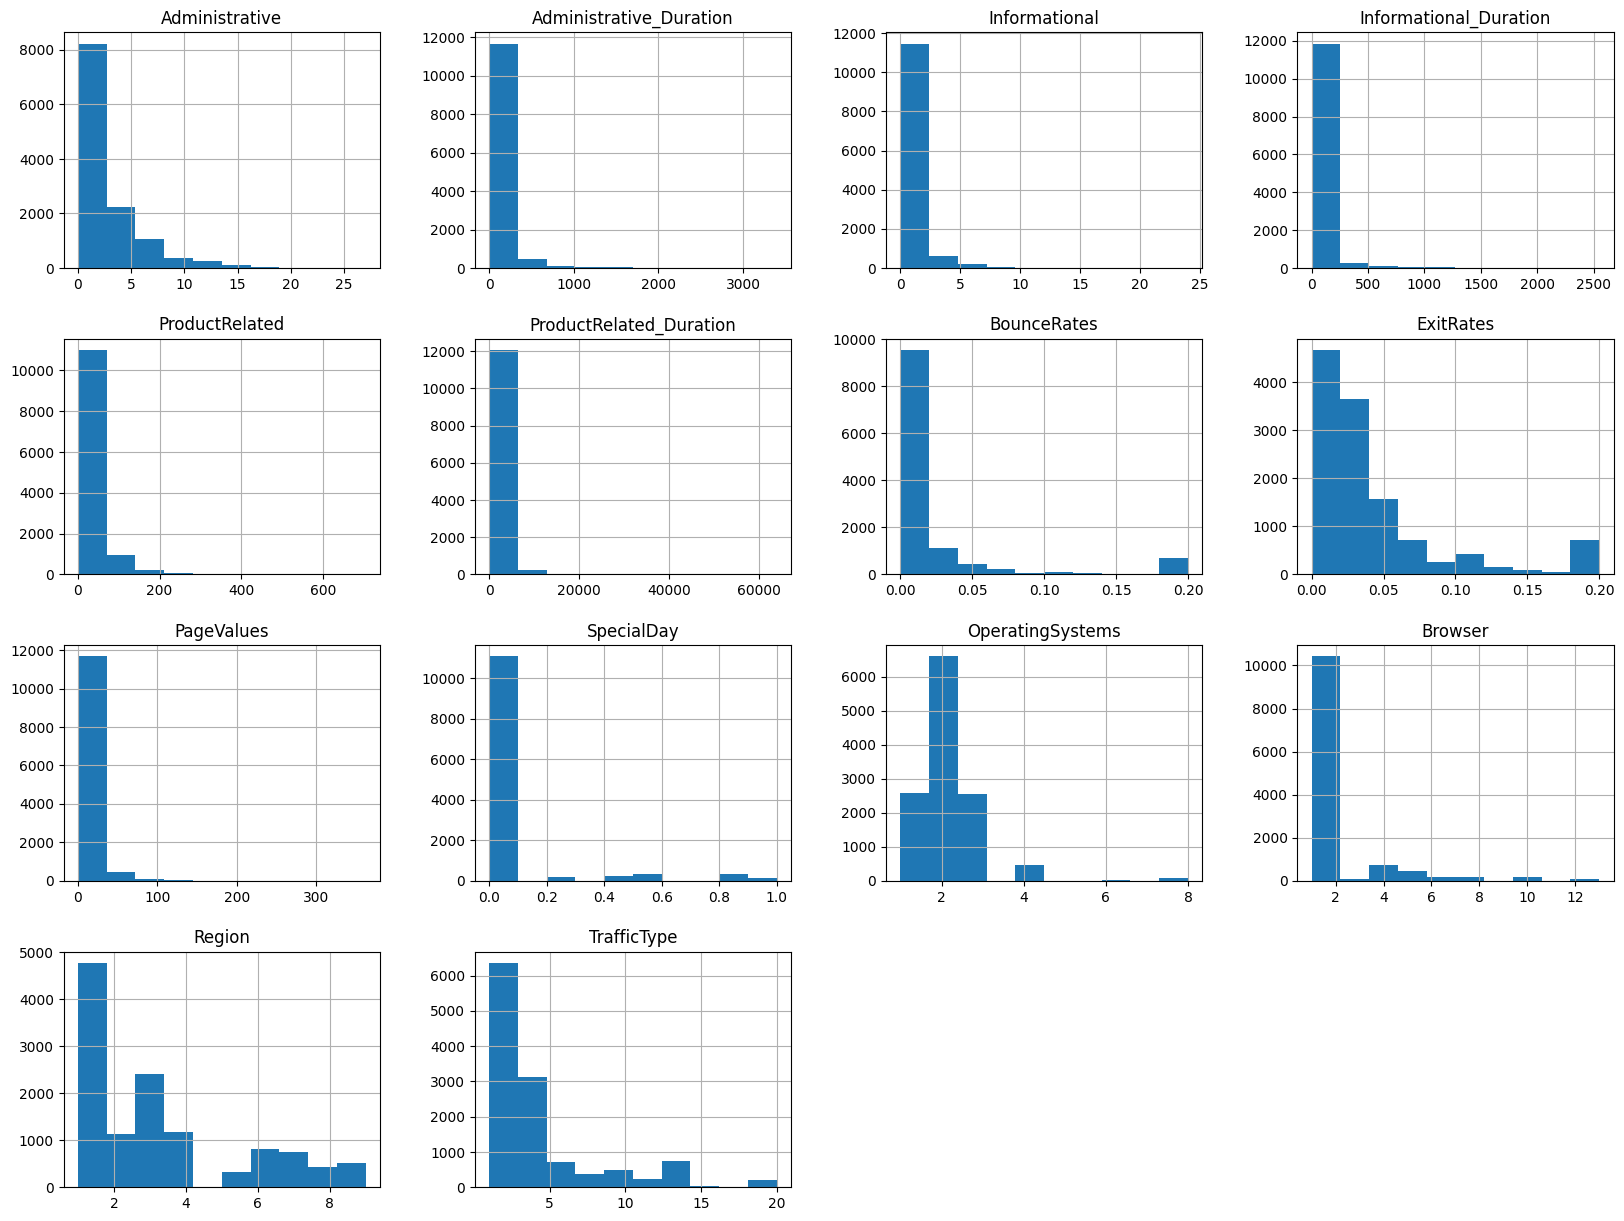

In [11]:
attributes = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated"
         ,"ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay",
          "OperatingSystems", "Browser","Region","TrafficType"]
df.hist(attributes,bins=10, figsize=(20,15))
plt.style.use('ggplot')
plt.show()

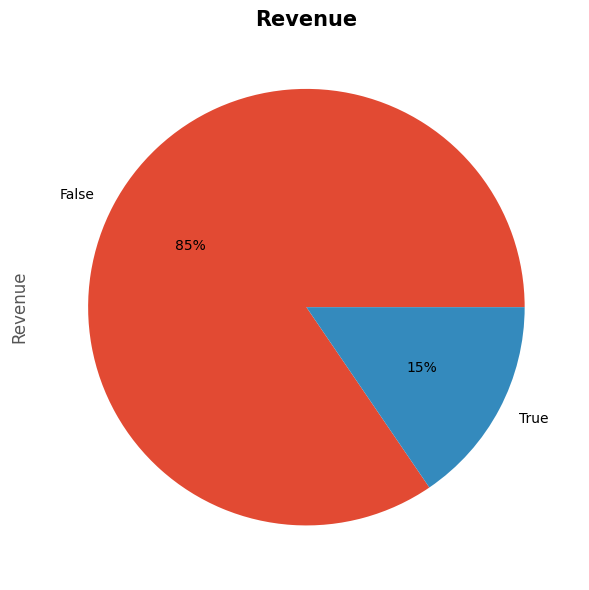

In [13]:
revenue_online = df['Revenue'].value_counts().plot.pie(figsize=(6,6), autopct='%1.0f%%')

#Formatting of the plot
plt.title('Revenue',fontweight='bold',size=15,color='black')
plt.style.use('ggplot') 
plt.tight_layout() #To plot our figure neatly
plt.show()

In [14]:
missing =df.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [16]:
X = df.drop('Revenue', axis=1)

Y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.2)

In [17]:
#Dropping features that have little correlation
shopping_training_drop = X_train.drop(['Browser','OperatingSystems','Region','TrafficType','Weekend','SpecialDay'], axis=1)
shopping_training_drop.head()

shopping_test_drop = X_test.drop(['Browser','OperatingSystems','Region','TrafficType','Weekend','SpecialDay'], axis=1)
shopping_test_drop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,Nov,Returning_Visitor
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,Mar,Returning_Visitor
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,Nov,Returning_Visitor
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,Aug,Returning_Visitor
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,Aug,Returning_Visitor


In [18]:
#One Hot encoding the month and visitor type

#Encosing for the training set
visitor_encoded = pd.get_dummies(shopping_training_drop['VisitorType'], prefix='Visitor_Type', drop_first = True)
month_encoded = pd.get_dummies(shopping_training_drop['Month'], prefix='Month_', drop_first = True)
shopping_training = pd.concat([shopping_training_drop, visitor_encoded,month_encoded], axis=1).drop(['VisitorType','Month'], axis=1)
shopping_training.head()

#Endocidng for the test set
visitor_encoded = pd.get_dummies(shopping_test_drop['VisitorType'], prefix='Visitor_Type', drop_first = True)
month_encoded = pd.get_dummies(shopping_test_drop['Month'], prefix='Month_', drop_first = True)
shopping_test = pd.concat([shopping_test_drop, visitor_encoded,month_encoded], axis=1).drop(['VisitorType','Month'], axis=1)
shopping_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Visitor_Type_Other,Visitor_Type_Returning_Visitor,Month__Dec,Month__Feb,Month__Jul,Month__June,Month__Mar,Month__May,Month__Nov,Month__Oct,Month__Sep
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0,1,0,0,0,0,0,0,1,0,0
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0,1,0,0,0,0,1,0,0,0,0
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0,1,0,0,0,0,0,0,1,0,0
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0,1,0,0,0,0,0,0,0,0,0
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0,1,0,0,0,0,0,0,0,0,0


#RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

#fitting a base model for comparison with final model
random_forest = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
random_forest.fit(shopping_training, y_train)

ypred_train= random_forest.predict(shopping_training)
ypred_test = random_forest.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
Randome_Forest_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',Randome_Forest_auc)

              precision    recall  f1-score   support

       False       0.89      0.99      0.93      2055
        True       0.84      0.38      0.52       411

    accuracy                           0.88      2466
   macro avg       0.87      0.68      0.73      2466
weighted avg       0.88      0.88      0.87      2466

ROC AUC Score 0.6827250608272506
